# Clustering

The goal of this notebook is to visualize the dataset and, perhaps, get some new ideas :)

## Load the master_df

The master_df is the dataframe that contains all the columns. This dataframe is for developers use only; otherwise, the public_df should be used.  

If you don't have already the master_df, send me an email to: eder_rdz_mtz@hotmail.com.
Once you have it, store it in a folder named 'dataset' (recommended).

In [1]:
import pickle
import pandas as pd
import numpy as np

with open('dataset/master_df.pkl','rb') as f: master_df = pickle.load(f)

In [2]:
master_df.head(10)

,Name,Norm SPC,Move,Status (eyeless),p_ae_s,Selected points,p_mlp_d
0,AA01_M1,"[[1.7564989224519107, 0.6253541802741319, 0.30...",1,clean,,"[[0.5233492437201133, 0.14731857028450931, 0.9...",
1,ABD_M1,"[[1.5398565942838736, 0.5883973510699563, 0.26...",1,missing,"[[1.5398565942838736, 0.5883973510699563, 0.26...","[[0.5723999460910196, 0.15795441902041232, 0.9...","[[1.5398565942838736, 0.5883973510699563, 0.26..."
2,AC_M1,"[[-0.38237177668932, 0.4728121540702672, 0.552...",1,missing,"[[-0.38237177668932, 0.4728121540702672, 0.552...","[[0.5882225036621094, 0.8022400140762329, 0.90...","[[-0.38237177668932, 0.4728121540702672, 0.552..."
3,AD01_M1,"[[1.538563204067707, 0.4405452084387405, 0.478...",1,missing,"[[1.538563204067707, 0.4405452084387405, 0.478...","[[0.5247540707843167, 0.23253715511166786, 0.9...","[[1.538563204067707, 0.4405452084387405, 0.478..."
4,AF_M1,"[[0.5033656406761701, -1.0511009564520297, 0.3...",1,missing,"[[0.5033656406761701, -1.0511009564520297, 0.3...","[[0.1558455208124025, 0.5632980800388543, 0.94...","[[0.5033656406761701, -1.0511009564520297, 0.3..."
5,AG01_M1,"[[-0.6370606706789314, 0.4947833761215819, 0.4...",1,missing,"[[-0.6370606706789314, 0.4947833761215819, 0.4...","[[0.6366619690754761, 0.8049594033418042, 0.97...","[[-0.6370606706789314, 0.4947833761215819, 0.4..."
6,AT01_M1,"[[1.5893278030871214, 0.4592183630978525, 0.49...",1,missing,"[[1.5893278030871214, 0.4592183630978525, 0.49...","[[0.4580058633526167, 0.17316963714122943, 0.9...","[[1.5893278030871214, 0.4592183630978525, 0.49..."
7,AVP01_M1,"[[1.4600032268662368, 0.5509395568848419, 0.29...",1,missing,"[[1.4600032268662368, 0.5509395568848419, 0.29...","[[0.5881980949494996, 0.1664862475084804, 0.95...","[[1.4600032268662368, 0.5509395568848419, 0.29..."
8,BT01_M1,"[[1.7603302429677312, 0.5991762288701772, 0.27...",1,missing,"[[1.7603302429677312, 0.5991762288701772, 0.27...","[[0.34753170476115974, 0.16969264144022106, 0....","[[1.7603302429677312, 0.5991762288701772, 0.27..."
9,CAD01_M1,"[[-0.37848795920322903, 0.570479088711932, 0.3...",1,missing,"[[-0.37848795920322903, 0.570479088711932, 0.3...","[[0.4504488307261923, 0.8138861585831804, 0.96...","[[-0.37848795920322903, 0.570479088711932, 0.3..."


master_df columns:
* Name: filename.
* Norm SPC: (spatially) normalized and (temporally) interpolated sequence of point coulds (SPC).
* Move: facial moves according to FRS 1, 2, 3, 4, and 5.
* Status (eyeless): flag that indicates if the corresponding SPC, excluding the eyes' markers, is complete (clean) or contains nan (missing).
* ...
* Selected points: SPC excluiding the eyes' markers. Use this column for further analysis, ex. clustering or anomaly detection. This column might be removed in the future.

## Select the dataset

In [5]:
model = 'p_mlp_d'

sel_SPC_list = []
for id_ in master_df.index:
    if master_df["Status (eyeless)"][id_] == "clean":
        sel_SPC_list.append(np.copy(master_df["Norm SPC"][id_][:, 9:-12]))
    else:
        sel_SPC_list.append(np.copy(master_df[model][id_][:, 9:-12]))
sel_SPC = np.array(sel_SPC_list)

### Example: P in summit

explained variance ratio (first two components): [0.91523205 0.03145562]


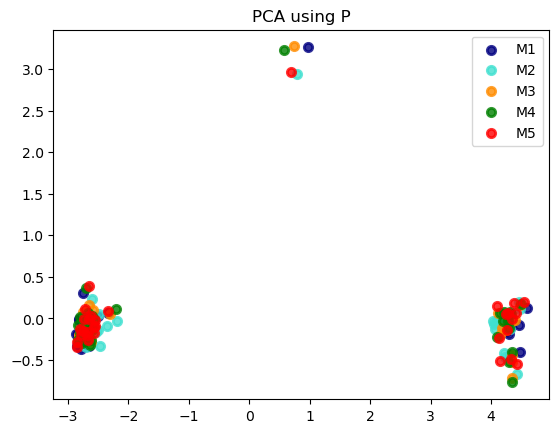

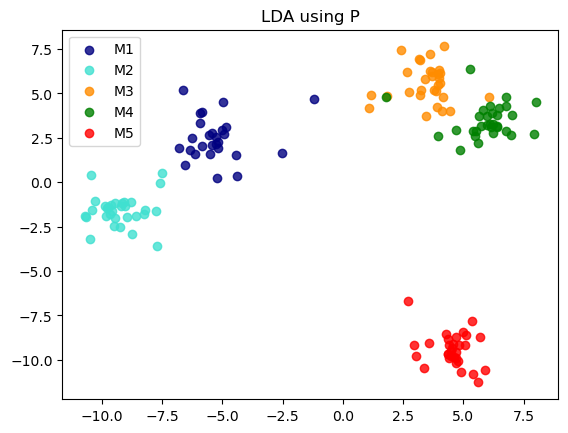

In [38]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t = 249
sel_SPC_summit = sel_SPC[:, t, :]
sel_SPC_summit.shape
X = np.copy(sel_SPC_summit)

m_list = master_df["Move"].tolist()
int_list = list(map(int, m_list))

y = np.array(int_list)
y = y-1

target_names = np.array(["M1", "M2", "M3", "M4", "M5"])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange", "green", "red"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA using P")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA using P")

plt.show()

In [54]:
from scipy.spatial import distance_matrix

PC_3D = sel_SPC_summit.reshape(150,-1,3)
PC_edv_list = []

for PC in PC_3D:
    DM = distance_matrix(PC, PC, p=2)
    DV = DM[np.triu_indices(DM.shape[0], k = 1)]
    PC_edv_list.append(DV)

edv_summit = np.array(PC_edv_list)

explained variance ratio (first two components): [0.18395937 0.15605606]


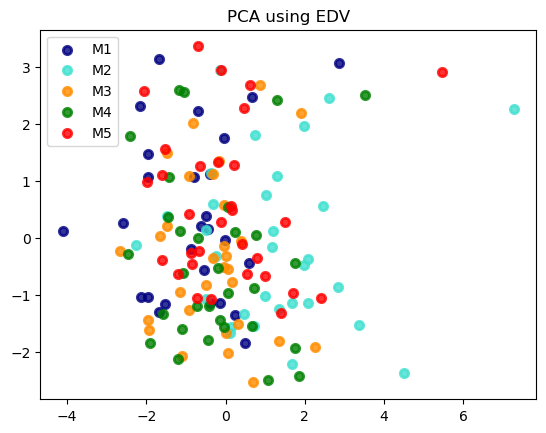

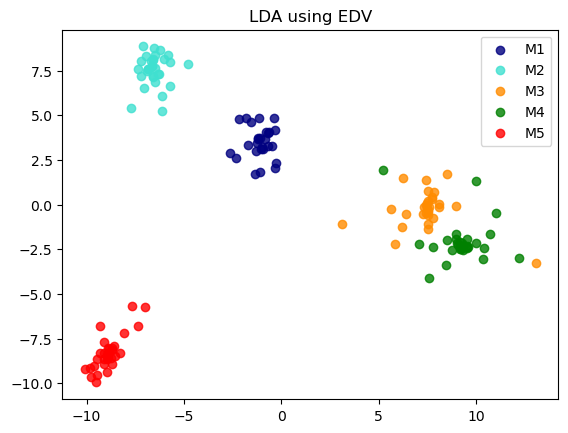

In [12]:
X = np.copy(feature)

m_list = master_df["Move"].tolist()
int_list = list(map(int, m_list))

y = np.array(int_list)
y = y-1

target_names = np.array(["M1", "M2", "M3", "M4", "M5"])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange", "green", "red"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA using EDV")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA using EDV")

plt.show()

In [13]:
sel_SPC.shape

(150, 500, 303)

In [16]:
sel_SPC_3D = sel_SPC.reshape(150,500,-1,3)
#sel_SPC_3D_0 = sel_SPC_3D[:, 0, :, :]

In [33]:
SPC_disp_dataset = []
for i in range(150):
    SPC_disp_csv = []
    for j in range(500):
        SPC_disp_mrk = []
        for k in range(101):
            a = np.copy(sel_SPC_3D[i, j, k, :])
            b = np.copy(sel_SPC_3D[i, 0, k, :])
            disp = np.linalg.norm(a-b)
            SPC_disp_mrk.append(disp)
        SPC_disp_csv.append(SPC_disp_mrk)
    #SPC_disp = np.array(SPC_disp_list)
    SPC_disp_dataset.append(SPC_disp_csv)

feature = np.array(SPC_disp_dataset)

In [36]:
feature_mean = np.mean(feature, axis=1)
feature_mean.shape

(150, 101)

explained variance ratio (first two components): [0.5251087  0.26284453]


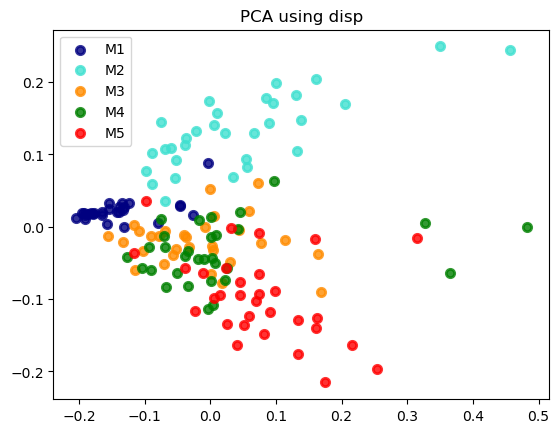

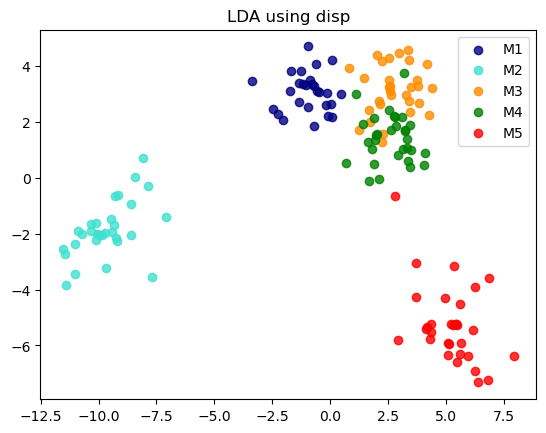

In [37]:
X = np.copy(feature_mean)

m_list = master_df["Move"].tolist()
int_list = list(map(int, m_list))

y = np.array(int_list)
y = y-1

target_names = np.array(["M1", "M2", "M3", "M4", "M5"])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange", "green", "red"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA using disp")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2, 3, 4], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA using disp")

plt.show()

### K-means

In [49]:
from sklearn.cluster import KMeans
import numpy as np

kmeans_disp = KMeans(n_clusters=5, random_state=0).fit(feature_mean)

In [50]:
kmeans_disp.labels_

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 4, 4, 4, 4, 1,
       0, 4, 4, 4, 4, 3, 4, 4, 3, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4, 1,
       4, 4, 2, 4, 4, 0, 4, 1, 1, 4, 4, 4, 4, 2, 2, 4, 4, 1, 4, 4, 4, 4,
       4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 4,
       4, 1, 3, 4, 1, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3], dtype=int32)

In [47]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [48]:
sel_SPC_summit.shape

(150, 303)

In [51]:
from sklearn.cluster import KMeans
import numpy as np

kmeans_PC_summit = KMeans(n_clusters=5, random_state=0).fit(sel_SPC_summit)

In [52]:
kmeans_PC_summit.labels_

array([0, 3, 4, 0, 2, 4, 0, 3, 0, 1, 1, 0, 0, 3, 0, 3, 3, 4, 4, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 3, 1, 0, 2, 4, 0, 3, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       1, 3, 1, 3, 4, 4, 3, 0, 3, 0, 0, 0, 1, 1, 0, 0, 4, 0, 2, 4, 0, 3,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 4, 3, 1, 3, 4, 4, 0, 0, 3, 0, 0, 0, 4,
       0, 0, 4, 0, 2, 4, 0, 3, 0, 1, 1, 1, 0, 1, 0, 3, 0, 4, 3, 1, 3, 4,
       4, 0, 0, 3, 0, 0, 0, 4, 4, 0, 3, 1, 0, 2, 4, 0, 3, 0, 1, 1, 1, 0,
       1, 0, 3, 0, 4, 3, 1, 3, 4, 4, 3, 0, 3, 0, 3, 0, 4, 4], dtype=int32)

In [55]:
from sklearn.cluster import KMeans
import numpy as np

kmeans_PC_summit = KMeans(n_clusters=5, random_state=0).fit(edv_summit)

In [56]:
kmeans_PC_summit.labels_

array([2, 0, 4, 1, 3, 4, 0, 0, 4, 0, 1, 2, 1, 0, 1, 0, 0, 4, 4, 1, 4, 0,
       4, 4, 4, 1, 1, 2, 0, 2, 2, 3, 4, 0, 0, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       1, 0, 4, 0, 4, 4, 1, 1, 0, 1, 2, 4, 2, 2, 2, 0, 4, 1, 3, 4, 0, 0,
       1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 4, 0, 4, 4, 1, 1, 0, 4, 1, 4, 1,
       2, 0, 1, 1, 3, 4, 0, 0, 1, 4, 1, 2, 2, 1, 1, 0, 1, 1, 0, 4, 0, 4,
       4, 1, 1, 0, 4, 1, 4, 1, 1, 2, 0, 4, 1, 3, 4, 0, 0, 1, 0, 1, 2, 2,
       1, 1, 0, 1, 1, 0, 4, 0, 4, 4, 1, 4, 0, 4, 1, 4, 1, 4], dtype=int32)